In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.integrate as inta
import pandas as pd
import random as ran
import sys

In [3]:
inta.quad(lambda x: x**2,0,1)

(0.33333333333333337, 3.700743415417189e-15)

## * Finding $R_{max}$

[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019
 0.002  0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029
 0.003  0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037] 36 [7.76070785e+02 7.17757750e+02 6.13946977e+02 4.85690920e+02
 3.55356970e+02 2.40461129e+02 1.50487157e+02 8.71019139e+01
 4.66260605e+01 2.30834889e+01 1.05692626e+01 4.47566049e+00
 1.75282018e+00 6.34868587e-01 2.12664459e-01 6.58823144e-02
 1.88757312e-02 5.00147134e-03 1.22560018e-03 2.77750445e-04
 5.82121215e-05 1.12829467e-05 2.02245914e-06 3.35260722e-07
 5.13959426e-08 7.28644547e-09 9.55302164e-10 1.15824746e-10
 1.29865818e-11 1.34653790e-12 1.29112958e-13 1.14484283e-14
 9.38737030e-16 7.11805452e-17 4.99108741e-18 3.23625526e-19]


Text(0.5, 1.0, 'Total charge between radii')

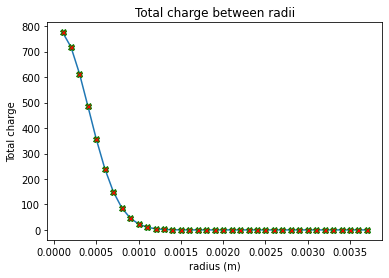

In [4]:
Nq = 200 #gain is 200 MeV
R = 2.5e+6 # Surface resistivity (ohm/square)
d = 100e-6 # Anode-readout plane separation (m)
eps_0 = 8.854e-12 # Permittivity of a vacuum (F/m)
k_1 = 3.3 # Relative permittivity of dielectric material (glue)
k_2 = 3.1 # Relative permittivity of dielectric material (mylar)
C = ((2*eps_0)/d)*((k_1*k_2)/(k_1+k_2)) # Capacitance per unit area with two dielectrics
h = 1/(R*C)
q = np.array([])
r = np.array([])
r = np.append(r,0)
#q = np.append(q,0)
t = 45e-9 #45 nano seconds 
e = 1.60217662e-19 #charge of an electron in coulombs
i = 0 #to keep track of index
found = False 
while found == False:
    r = np.append(r,r[i]+1e-4)
    charge = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),r[i],r[i+1])
    if charge[0] <= e:
        print(r,i,q)
        found = True
        
    q = np.append(q,charge[0])

    i += 1
r = np.delete(r,0)   
plt.plot(r,q,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets focus on the parts where Total charge is less than 1

Text(0.5, 1.0, 'Total charge between radii')

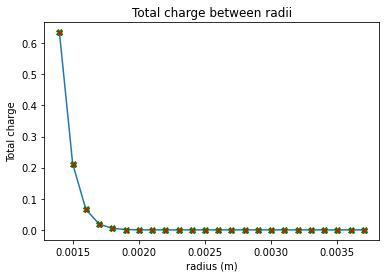

In [5]:

plt.plot(r[np.where(q<1)],q[np.where(q<1)],marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets make a Data frame to show the values.

In [6]:
list(q)

[776.0707849617197,
 717.757750140507,
 613.9469765285878,
 485.6909195795655,
 355.3569698082,
 240.46112906481076,
 150.4871572697839,
 87.10191392902544,
 46.626060521895596,
 23.083488864414868,
 10.569262615718182,
 4.475660492642926,
 1.7528201770069307,
 0.6348685871557583,
 0.21266445933305037,
 0.06588231440673456,
 0.01887573120215323,
 0.005001471341602033,
 0.0012256001811081108,
 0.00027775044455940123,
 5.821212146770263e-05,
 1.1282946735517056e-05,
 2.0224591370810268e-06,
 3.3526072192446126e-07,
 5.139594263889443e-08,
 7.286445469347251e-09,
 9.553021635478307e-10,
 1.1582474561671752e-10,
 1.29865817794732e-11,
 1.3465379005432483e-12,
 1.2911295766207834e-13,
 1.1448428305229149e-14,
 9.387370302933272e-16,
 7.118054516966336e-17,
 4.991087413679018e-18,
 3.2362552617730786e-19,
 1.9404448739150593e-20]

In [7]:

ChangeR = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeR["Radius (m)"] = pd.Series(r)
ChangeR["Total charge (C)"] = pd.Series(q)
ChangeR= ChangeR.drop([36])
ChangeR


,Radius (m),Total charge (C)
0,0.0001,7.760708e+02
1,0.0002,7.177578e+02
2,0.0003,6.139470e+02
3,0.0004,4.856909e+02
4,0.0005,3.553570e+02
5,0.0006,2.404611e+02
6,0.0007,1.504872e+02
7,0.0008,8.710191e+01
8,0.0009,4.662606e+01
9,0.0010,2.308349e+01


### Changing Area

[0.00000000e+00 9.98969506e-05 1.41275622e-04 ... 3.64589657e-03
 3.64726489e-03 3.64863270e-03] 1165 [7.75291758e+02 3.07112263e+02 2.26484843e+02 ... 1.79726660e-19
 1.72737917e-19 1.66020996e-19]


Text(0.5, 1.0, 'Total charge between radii')

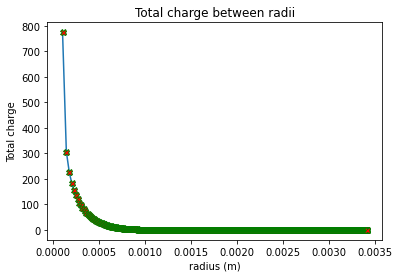

In [8]:
#our final radius should be 0.00365 as that is close to where the charge is essencially of that of an electron
R = 0.00365 #m
Segments = 1335 # number of segments with equal area pi*0.1^2  
Ar=np.array([])
for ith in np.arange(0,Segments,1):
    newr = R*np.sqrt(ith/Segments)
    Ar = np.append(Ar,newr)
Aq = np.array([])

j=0 #index
foundA = False 
while foundA == False:
    
    chargeA = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),Ar[j],Ar[j+1])
    if chargeA[0] <= e:
        print(Ar,j,Aq)
        foundA = True
    Aq = np.append(Aq,chargeA[0])

    j += 1
 

    
newAr =np.array([]) #Keeping radii that have total charge > e

for b in np.arange(0,len(Aq)+1,1):
    newAr = np.append(newAr,Ar[b])
newAr = np.delete(newAr,0) 
plt.plot(newAr,Aq,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")



### Lets focus on Total charge less that 0.1

Text(0.5, 1.0, 'Total charge between radii')

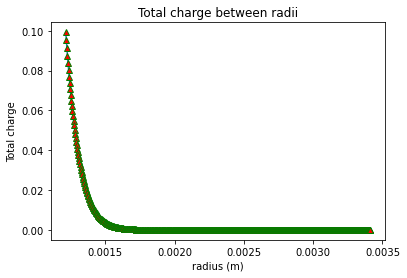

In [9]:
plt.plot(newAr[np.where(Aq < 0.1)],Aq[np.where(Aq < 0.1)],marker= "^",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")


### Make a dataframe.

In [10]:
ChangeA = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeA["Radius (m)"] = pd.Series(newAr)
ChangeA["Total charge (C)"] = pd.Series(Aq)
ChangeA

,Radius (m),Total charge (C)
0,0.000100,7.752918e+02
1,0.000141,3.071123e+02
2,0.000173,2.264848e+02
3,0.000200,1.835548e+02
4,0.000223,1.554772e+02
...,...,...
1161,0.003405,1.869982e-19
1162,0.003407,1.797267e-19
1163,0.003408,1.727379e-19
1164,0.003410,1.660210e-19


## Making circles

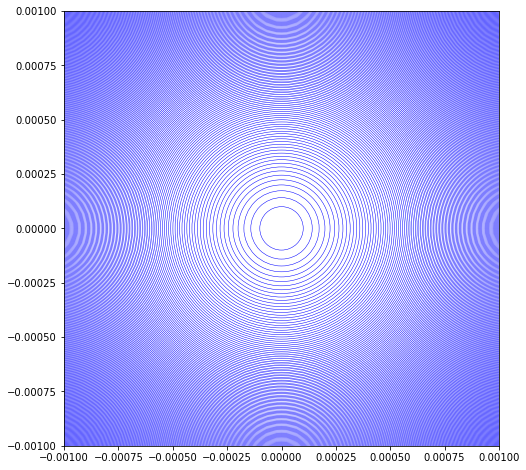

In [11]:

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")


for i in range(0,len(newAr)):
    c = plt.Circle((0,0), newAr[i],fill = 0,lw = 0.5,color= "blue")
    ax.add_artist(c)

plt.xlim([-0.001,0.001])
plt.ylim([-0.001,0.001])

  
plt.show()


## plotting points


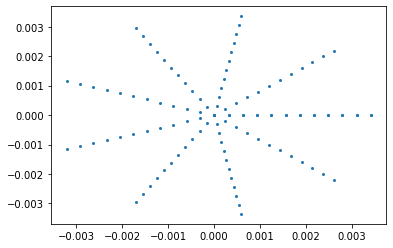

In [12]:
points = 120
rmax = 0.003411
ppa = 10 #number of points per annulie
valuesr = np.linspace(0.00001,rmax,int(points/ppa))
pirange = np.linspace(0.00001,2*np.pi,int(ppa))
x = np.array([])
y = np.array([])
for r in valuesr:
    for theta in pirange:
        x=np.append(x,r*np.cos(theta))
        y=np.append(y,r*np.sin(theta))
plt.scatter(x,y,marker=".",lw=0.01)


In [13]:
rad= ChangeA.iloc[:,0]
Totcharge = ChangeA.iloc[:,1]
count = 0
cpp = np.array([0,]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in valuesr:
        if cur > rad[i-1] and cur< rad[i]:
            count += ppa
    if count > 0:
        cpp = np.append(cpp,Totcharge[i]/count)
    else:
        cpp = np.append(cpp,0)


In [14]:
ChangeA["Charge per Point"] = pd.Series(cpp)
ChangeA

,Radius (m),Total charge (C),Charge per Point
0,0.000100,7.752918e+02,0.000000e+00
1,0.000141,3.071123e+02,0.000000e+00
2,0.000173,2.264848e+02,0.000000e+00
3,0.000200,1.835548e+02,0.000000e+00
4,0.000223,1.554772e+02,0.000000e+00
...,...,...,...
1161,0.003405,1.869982e-19,1.869982e-21
1162,0.003407,1.797267e-19,1.797267e-21
1163,0.003408,1.727379e-19,1.727379e-21
1164,0.003410,1.660210e-19,1.660210e-21


In [15]:
ChangeA.describe()

,Radius (m),Total charge (C),Charge per Point
count,1166.000000,1.166000e+03,1.166000e+03
mean,0.002276,3.013996e+00,1.007080e-01
std,0.000803,2.785952e+01,6.328145e-01
min,0.000100,1.595653e-19,0.000000e+00
25%,0.001708,1.689631e-14,1.260952e-16
50%,0.002413,1.897353e-09,1.815415e-11
75%,0.002955,2.459286e-04,3.266926e-06
max,0.003411,7.752918e+02,8.031724e+00


Text(0.5, 0, 'Radius')

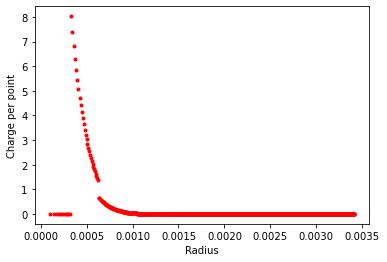

In [16]:
plt.plot(ChangeA.loc[:,"Radius (m)"],ChangeA.loc[:,"Charge per Point"],".r")
plt.ylabel("Charge per point")
plt.xlabel("Radius")


<AxesSubplot:ylabel='Frequency'>

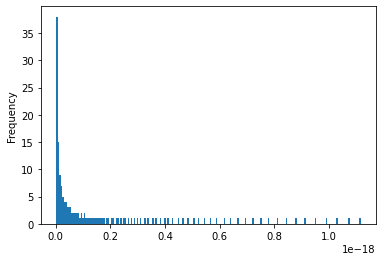

In [17]:
Charging = ChangeA.loc[1000:,"Charge per Point"]
Charging[Charging != 0].plot.hist(bins=200)

### playing around with randomness

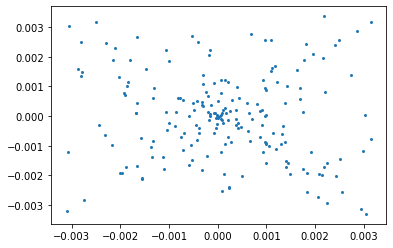

In [18]:
points = 200
rmax = 0.003411
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))

plt.scatter(xtest,ytest,marker=".",lw=0.01)


In [19]:
rad= np.array([0,])
rad= np.append(rad,ChangeA.iloc[:,0])
Totcharge = ChangeA.iloc[:,1]
count = 0
cpptest = np.array([]) #charge per point in coulombs
for i in range(1,len(rad)):
    for cur in rrange:
        if cur > rad[i-1] and cur< rad[i]:
            count += 1
    if count > 0:
        cpptest = np.append(cpptest,Totcharge[i-1]/count)
    else:
        cpptest = np.append(cpptest,0)


In [20]:
changeAtest =ChangeA
changeAtest["Charge per Point"] = cpptest
changeAtest


,Radius (m),Total charge (C),Charge per Point
0,0.000100,7.752918e+02,3.876459e+02
1,0.000141,3.071123e+02,7.677807e+01
2,0.000173,2.264848e+02,3.774747e+01
3,0.000200,1.835548e+02,3.059246e+01
4,0.000223,1.554772e+02,2.221102e+01
...,...,...,...
1161,0.003405,1.869982e-19,1.869982e-21
1162,0.003407,1.797267e-19,1.797267e-21
1163,0.003408,1.727379e-19,1.727379e-21
1164,0.003410,1.660210e-19,1.660210e-21


Text(0.5, 0, 'Radius')

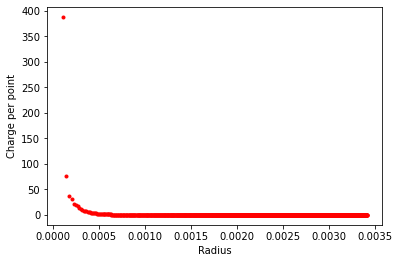

In [21]:
plt.plot(changeAtest.loc[:,"Radius (m)"],changeAtest.loc[:,"Charge per Point"],".r")
plt.ylabel("Charge per point")
plt.xlabel("Radius")


<AxesSubplot:ylabel='Frequency'>

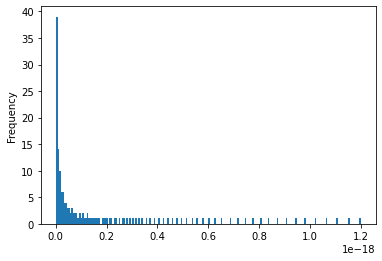

In [22]:
Charging = changeAtest.loc[1000:,"Charge per Point"]
Charging[Charging != 0].plot.hist(bins=200)

### setting up pad

In [23]:
pads = np.zeros((32,32))
np.set_printoptions(threshold=sys.maxsize)
pads

padxpos= np.linspace(0,31*2.2e-3,32)
padypos= np.linspace(0,31*2.2e-3,32)


In [24]:
#pad id
padid = np.array([],)#padid,x,y
counter=0
np.set_printoptions(suppress=True)
for x in padxpos:
    for y in padypos:
        padid=np.append(padid,[counter,x,y])
        counter +=1
print(padid)

[   0.        0.        0.        1.        0.        0.0022    2.
    0.        0.0044    3.        0.        0.0066    4.        0.
    0.0088    5.        0.        0.011     6.        0.        0.0132
    7.        0.        0.0154    8.        0.        0.0176    9.
    0.        0.0198   10.        0.        0.022    11.        0.
    0.0242   12.        0.        0.0264   13.        0.        0.0286
   14.        0.        0.0308   15.        0.        0.033    16.
    0.        0.0352   17.        0.        0.0374   18.        0.
    0.0396   19.        0.        0.0418   20.        0.        0.044
   21.        0.        0.0462   22.        0.        0.0484   23.
    0.        0.0506   24.        0.        0.0528   25.        0.
    0.055    26.        0.        0.0572   27.        0.        0.0594
   28.        0.        0.0616   29.        0.        0.0638   30.
    0.        0.066    31.        0.        0.0682   32.        0.0022
    0.       33.        0.0022    0.0022   

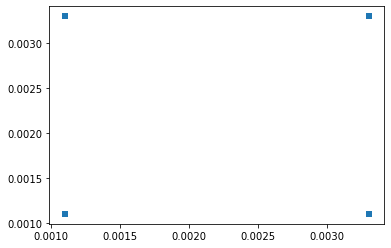

In [25]:
ija = [0.0011,0.0011,0.0033,0.0033]
jia = [0.0011,0.0033,0.0011,0.0033]
plt.scatter(ija,jia,lw=2222,marker="s")

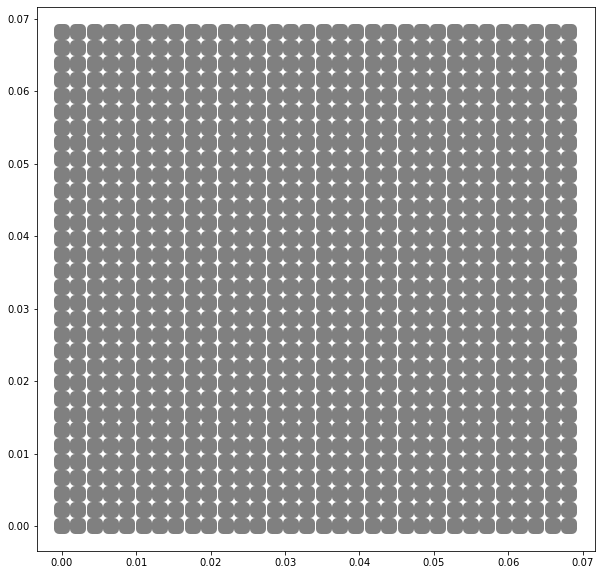

In [41]:
xval = []
yval = []
for x in padxpos:
    for y in padypos:
        xval.append(x)
        yval.append(y)
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")

### Placing electron and charge spread

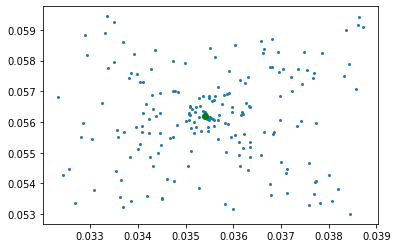

In [44]:
electronpos = np.random.uniform(0,32*2.2e-3,2)
pointpos = np.array([])

points = 200
rmax = 0.003411
rrange = np.random.uniform(-rmax,rmax,points)
xtest = rrange*np.cos(np.random.uniform(0,np.pi,points))+electronpos[0]
ytest = rrange*np.sin(np.random.uniform(0,np.pi,points))+electronpos[1]

plt.scatter(xtest,ytest,marker=".",lw=0.01)
plt.scatter(electronpos[0],electronpos[1],color="g")


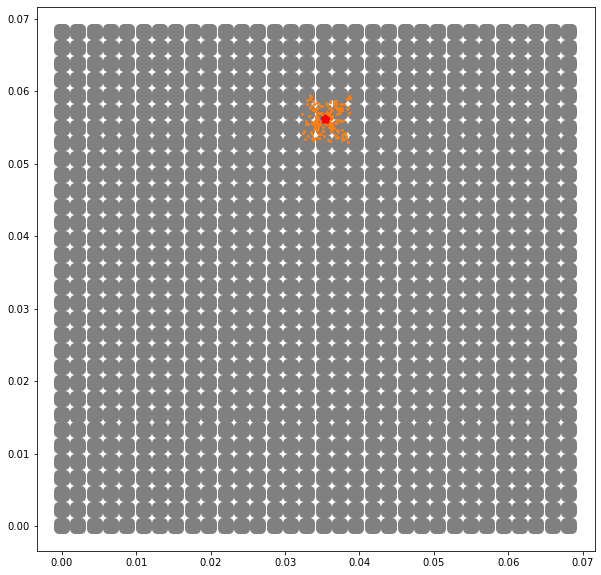

In [47]:
#put them together
plt.figure(figsize=(10,10))
plt.scatter(xval,yval,marker="s",lw=10,edgecolors="grey")
plt.scatter(xtest,ytest,marker=".",lw=0.01)
plt.scatter(electronpos[0],electronpos[1],color="r",marker="*",lw=4)

In [49]:
print(np.min(xtest),np.min(ytest))

0.0323276875434563 0.05300307386708893
